In [15]:
import pandas as pd
import requests
import json
from pprint import pprint
from api_keys import nasdaq_key
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates

In [8]:
#get table to see region data
#region code 102001 is for ALL of USA
#region type can change to city/metro/or region code. use metro to get region codes.

table_code = "ZILLOW/REGIONS"
region_type = "metro"
format ="json"
request_url = f"https://data.nasdaq.com/api/v3/datatables/{table_code}.{format}?region_type={region_type}&api_key={nasdaq_key}"
starting_data = requests.get(request_url).json()
pprint(starting_data)

{'datatable': {'columns': [{'name': 'region_id', 'type': 'text'},
                           {'name': 'region_type', 'type': 'text'},
                           {'name': 'region', 'type': 'text'}],
               'data': [['845172', 'metro', 'Winfield, KS; KS'],
                        ['845171', 'metro', 'Union, SC; SC'],
                        ['845170', 'metro', 'Scottsburg, IN; IN'],
                        ['845169', 'metro', 'Rockport, TX; TX'],
                        ['845168', 'metro', 'Pearsall, TX; TX'],
                        ['845167', 'metro', 'Ottawa, IL; IL'],
                        ['845166', 'metro', 'Mount Gay, WV; WV'],
                        ['845165', 'metro', 'Minden, LA; LA'],
                        ['845164', 'metro', 'Lebanon, NH; NH'],
                        ['845163', 'metro', 'Jasper, AL; AL'],
                        ['845162', 'metro', 'Granbury, TX; TX'],
                        ['845161', 'metro', 'Bluffton, IN; IN'],
                        ['845

In [9]:
# Define a list of cities you want to search for
cities = ['New York', 'Los Angeles', 'Miami', 'St. Louis',
          'Seattle', 'Atlanta', 'Houston', 'Minneapolis']

# create an empty dictionary to store the city data frames
city_dfs = {}
df17s = {}
df20s = {}

# loop through each city in the list and search for the city code
for city_name in cities:
    for row in starting_data['datatable']['data']:
        if city_name in row[2]:
            city_code = row[0]
            break

    # use the city code to query the API and retrieve the data
    url = f"https://data.nasdaq.com/api/v3/datatables/ZILLOW/DATA?indicator_id=ZSFH&region_id={city_code}&api_key={nasdaq_key}"
    response = requests.get(url)
    city_data = response.json()

    # create a data frame for the city and clean the data
    city_df = pd.DataFrame(city_data['datatable']['data'], columns=['indicator_id', 'region_id', 'date', 'price'])
    city_df['date'] = pd.to_datetime(city_df['date'])
    city_df = city_df.sort_values('date')
    
    # drop the columns 'indicator_id' and 'region_id'
    city_df = city_df.drop(['indicator_id', 'region_id'], axis=1)
    
    # create df for 2017-2019
    # create a data frame for the city and clean the data
    df17 = pd.DataFrame(city_data['datatable']['data'], columns=['indicator_id', 'region_id', 'date', 'price'])
    df17['date'] = pd.to_datetime(df17['date'])
    df17 = df17.sort_values('date')
    
    # drop the columns 'indicator_id' and 'region_id'
    df17 = df17.drop(['indicator_id', 'region_id'], axis=1)
    
    # create df for 2020-2022
    # create a data frame for the city and clean the data
    df20 = pd.DataFrame(city_data['datatable']['data'], columns=['indicator_id', 'region_id', 'date', 'price'])
    df20['date'] = pd.to_datetime(city_df['date'])
    df20 = df20.sort_values('date')
    
    # drop the columns 'indicator_id' and 'region_id'
    df20 = df20.drop(['indicator_id', 'region_id'], axis=1)

    #create dataframe of cities
    city_dfs[city_name] = city_df
    df17s [city_name] = df17
    df20s [city_name] = df20

#clean data down to data range for samples
for city_name, city_df in city_dfs.items():
    city_dfs[city_name] = city_df[(city_df['date'] >= '2018-01-31') & (city_df['date'] <= '2022-12-31')]
    
for city_name, df17 in df17s.items():
    df17s[city_name] = df17[(df17['date'] >= '2017-01-31') & (df17['date'] <= '2019-12-31')]    
    
for city_name, df20 in df20s.items():
    df20s[city_name] = df20[(df20['date'] >= '2020-01-31') & (df20['date'] <= '2022-12-31')]  



In [10]:
#set vars for dataframes by city name to access them easier for plotting
#New York', 'Los Angeles', 'Miami', 'St. Louis', 'Seattle', 'Atlanta', 'Houston', 'Minneapolis'
new_york = city_dfs["New York"]
los_angeles = city_dfs["Los Angeles"]
miami = city_dfs["Miami"]
stl = city_dfs["St. Louis"]
seattle = city_dfs["Seattle"]
atlanta = city_dfs["Atlanta"]
houston = city_dfs["Houston"]
minneapolis = city_dfs["Minneapolis"]

In [11]:
#set vars for 2017 dataframes by city name to access them easier for plotting
#New York', 'Los Angeles', 'Miami', 'St. Louis', 'Seattle', 'Atlanta', 'Houston', 'Minneapolis'
new_york_17 = df17s["New York"]
los_angeles_17 = df17s["Los Angeles"]
miami_17 = df17s["Miami"]
stl_17 = df17s["St. Louis"]
seattle_17 = df17s["Seattle"]
atlanta_17 = df17s["Atlanta"]
houston_17 = df17s["Houston"]
minneapolis_17 = df17s["Minneapolis"]

In [12]:
#set vars for 2020 dataframes by city name to access them easier for plotting
#New York', 'Los Angeles', 'Miami', 'St. Louis', 'Seattle', 'Atlanta', 'Houston', 'Minneapolis'
new_york_20 = df20s["New York"]
los_angeles_20 = df20s["Los Angeles"]
miami_20 = df20s["Miami"]
stl_20 = df20s["St. Louis"]
seattle_20 = df20s["Seattle"]
atlanta_20 = df20s["Atlanta"]
houston_20 = df20s["Houston"]
minneapolis_20 = df20s["Minneapolis"]

In [26]:
#this is just a block to test and make sure the date range looks good. which it does! 
new_york_20

,date,price
38,2020-01-31,483093.000000
37,2020-02-29,484035.000000
36,2020-03-31,485110.000000
35,2020-04-30,486321.000000
34,2020-05-31,487551.000000
33,2020-06-30,488053.000000
32,2020-07-31,487076.000000
31,2020-08-31,491343.000000
30,2020-09-30,498252.000000
29,2020-10-31,503525.000000


In [13]:
def overlay_plotter(city, ylim1, ylim2):    
    # Create a figure and axis object
    fig, ax = plt.subplots()

    ax.set_ylabel('Housing Costs')
    # Plot the data for 2018-2020 on one line
    data1 = df17s[city]['price']
    ax.plot(df17s[city]['date'], data1, label='2017-2019')
    # Plot the data for 2021-2023 on another line
    data2 = df20s[city]['price']
    ax.plot(df20s[city]['date'], data2, label='2020-2022')
    
    plt.ylim([ylim1 , ylim2])
    plt.ticklabel_format(style='plain', useOffset=False, axis='y')
    
    # Add a legend to the plot
    ax.legend()
    # Show the plot
    plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

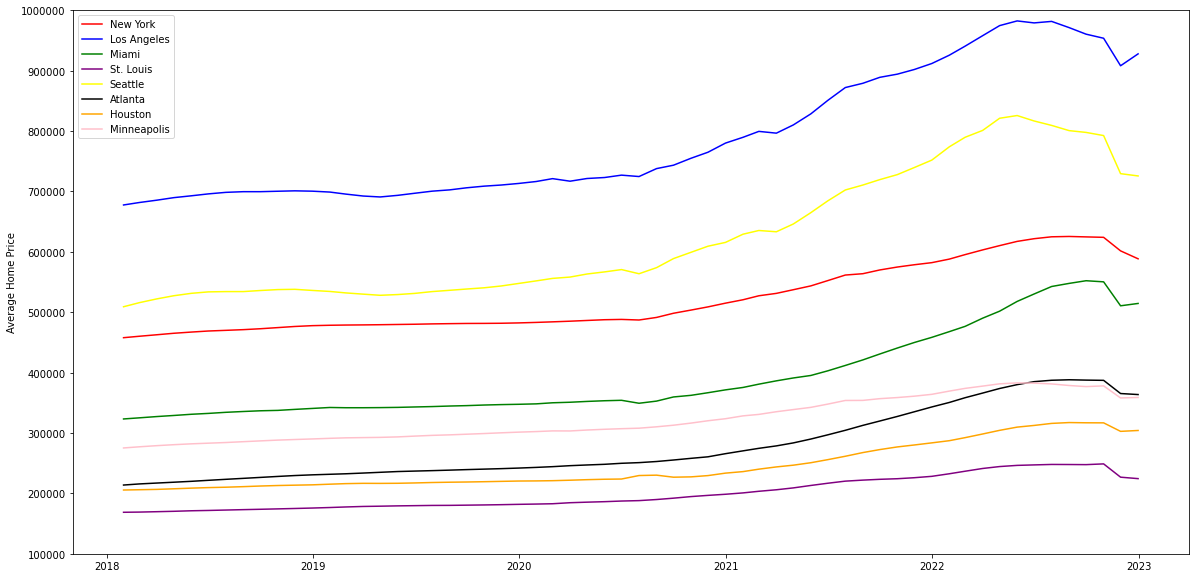

In [16]:
# plots all cities at one time for 2017 - 2022
cities = ['New York', 'Los Angeles', 'Miami', 'St. Louis',
          'Seattle', 'Atlanta', 'Houston', 'Minneapolis']


plt.figure(figsize=(20,10))


plt.plot(city_dfs["New York"]["date"],city_dfs["New York"]["price"],color='red')
plt.plot(city_dfs["Los Angeles"]["date"],city_dfs["Los Angeles"]["price"],color='blue')
plt.plot(city_dfs["Miami"]["date"],city_dfs["Miami"]["price"],color='green')
plt.plot(city_dfs["St. Louis"]["date"],city_dfs["St. Louis"]["price"],color='purple')
plt.plot(city_dfs["Seattle"]["date"],city_dfs["Seattle"]["price"],color='yellow')
plt.plot(city_dfs["Atlanta"]["date"],city_dfs["Atlanta"]["price"],color='black')
plt.plot(city_dfs["Houston"]["date"],city_dfs["Houston"]["price"],color='orange')
plt.plot(city_dfs["Minneapolis"]["date"],city_dfs["Minneapolis"]["price"],color='pink')

plt.legend(cities)

plt.xticks(rotation=0)


plt.ylim([100000 , 1000000])
plt.ticklabel_format(style='plain', useOffset=False, axis='y')


plt.ylabel("Average Home Price")
#plt.title(f'{city} Metro Area')
plt.show

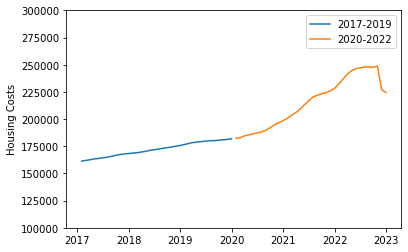

In [29]:
# Create a figure and axis object
fig, ax = plt.subplots()

# Set the y-axis label
ax.set_ylabel('Housing Costs')

# Plot the data for 2018-2020 on one line
data1 = df17s["St. Louis"]['price']
ax.plot(df17s["St. Louis"]['date'], data1, label='2017-2019')

# Plot the data for 2021-2023 on another line
data2 = df20s["St. Louis"]['price']
ax.plot(df20s["St. Louis"]['date'], data2, label='2020-2022')

# Add a legend to the plot
ax.legend()

plt.ylim([100000 , 300000])

# Show the plot
plt.show()

In [ ]:
#stl2 = stl['datatable']['data']
#date = []
#price = []
#for x in stl2:
#    date.append(x[2])
#    price.append(x[3])
#stl_df = pd.DataFrame({"Date":date,
#                       "Price":price
#                      })
# flips dataframe putting most recent data at the bottom
#stl_df = stl_df.iloc[::-1]

In [ ]:
#plot function
#def plotter(df, ylim1, ylim2, city):
#    plt.figure(figsize=(20,10))
#    plt.scatter(df["Date"],df["Price"])
#    plt.xticks(rotation=45)
#    plt.xlim(["2017-01-31", "2022-12-31"])
#    plt.ylim([ylim1 , ylim2])
#    plt.ylabel("Average Home Price")
#    plt.title(f'{city} Metro Area')
#    plt.show